In [ ]:
#load basic libraries
####
import pandas as pd
import numpy as np
!pip3 install dateparser
import dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load datasets

df_train = pd.read_csv('/content/train.csv', index_col = 0)
df_test = pd.read_csv('//content/test.csv', index_col = 0)

Data Exploration

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80176 entries, 0 to 80175
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              80176 non-null  object 
 1   org               76725 non-null  object 
 2   tld               76723 non-null  object 
 3   ccs               80176 non-null  int64  
 4   bcced             80176 non-null  int64  
 5   mail_type         80004 non-null  object 
 6   images            80176 non-null  int64  
 7   urls              80176 non-null  int64  
 8   salutations       80176 non-null  int64  
 9   designation       80176 non-null  int64  
 10  chars_in_subject  80160 non-null  float64
 11  chars_in_body     80176 non-null  int64  
 12  label             80176 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 8.6+ MB


In [ ]:
df_train.describe()

,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
count,80176.000000,80176.000000,80176.000000,80176.000000,80176.000000,80176.000000,80160.000000,8.017600e+04,80176.000000
mean,0.473259,0.002869,7.875998,34.433172,0.406381,0.104246,51.535254,1.971784e+05,1.557187
std,3.178805,0.053484,305.444093,97.904682,0.491160,0.305581,33.718283,1.890130e+06,1.713352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,32.000000,4.651000e+03,1.000000
50%,0.000000,0.000000,2.000000,17.000000,0.000000,0.000000,42.000000,1.999950e+04,1.000000
75%,0.000000,0.000000,8.000000,44.000000,1.000000,0.000000,62.000000,4.519300e+04,2.000000
max,179.000000,1.000000,83481.000000,21540.000000,1.000000,1.000000,606.000000,7.438108e+07,7.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

sns.set()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56d1f1d6a0>,
      dtype=object)

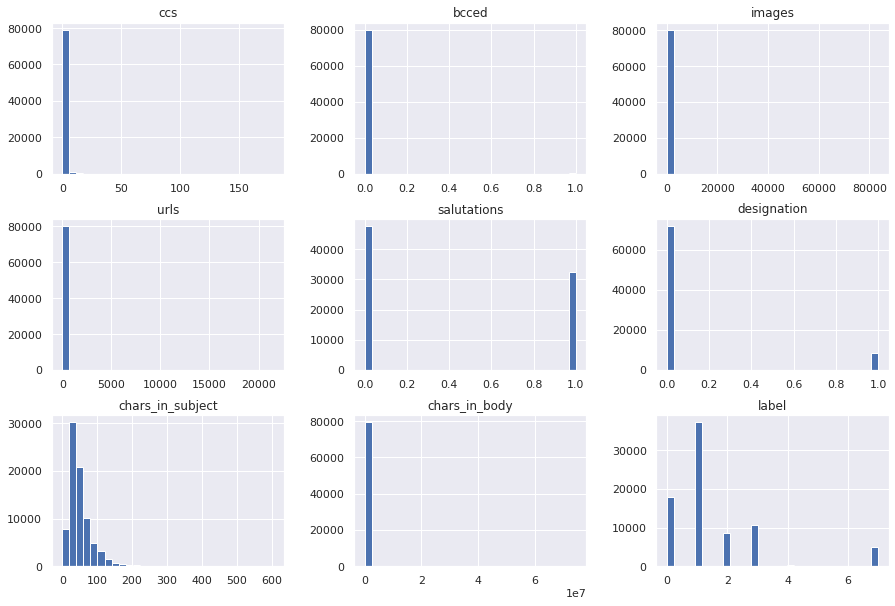

In [ ]:
df_train.hist(bins=30, figsize=(15, 10))

In [ ]:
df_train.columns

Index(['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls',
       'salutations', 'designation', 'chars_in_subject', 'chars_in_body',
       'label'],
      dtype='object')

In [ ]:

df_train.loc[: , ['date', 'org', 'tld', 'bcced', 'mail_type', 
       'salutations', 'designation','label']].boxplot(figsize = (15,15), rot = 90, fontsize= '8', grid = False)
plt.show()

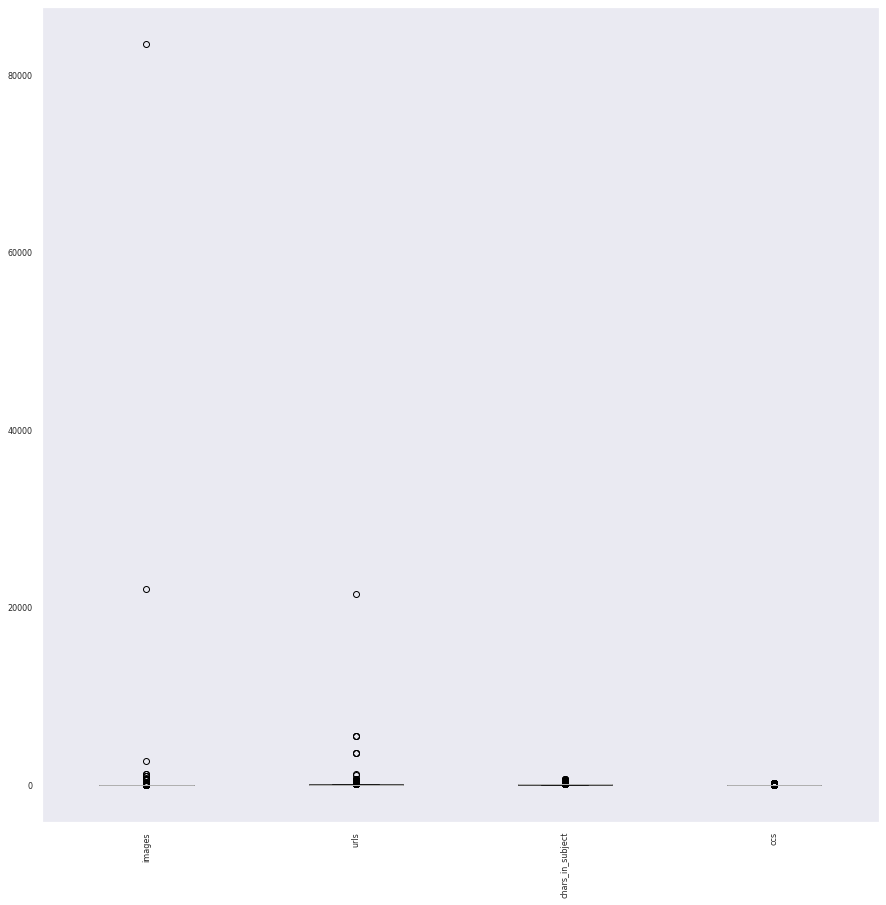

In [ ]:
df_train.loc[: , ['images', 'urls', 'chars_in_subject', 'ccs']].boxplot(figsize = (15,15), rot = 90, fontsize= '8', grid = False)
plt.show()

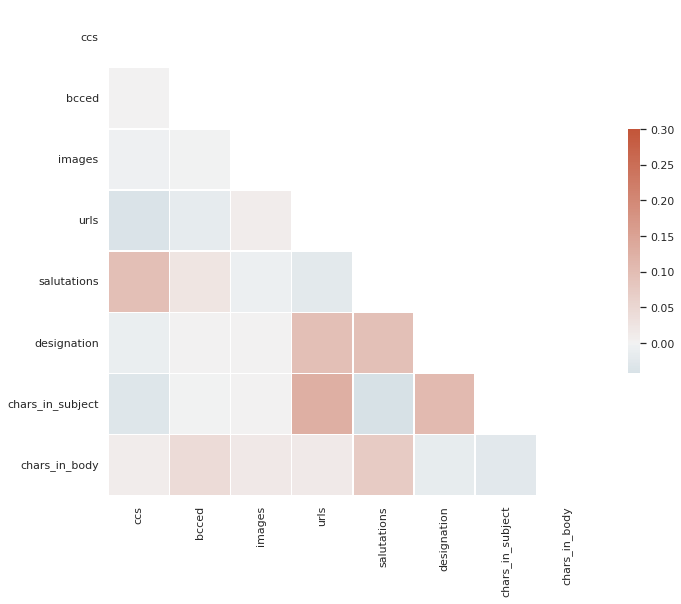

In [ ]:
from string import ascii_letters

sns.set_theme(style="white")

d = df_train[['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls','salutations', 'designation', 'chars_in_subject', 'chars_in_body']]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

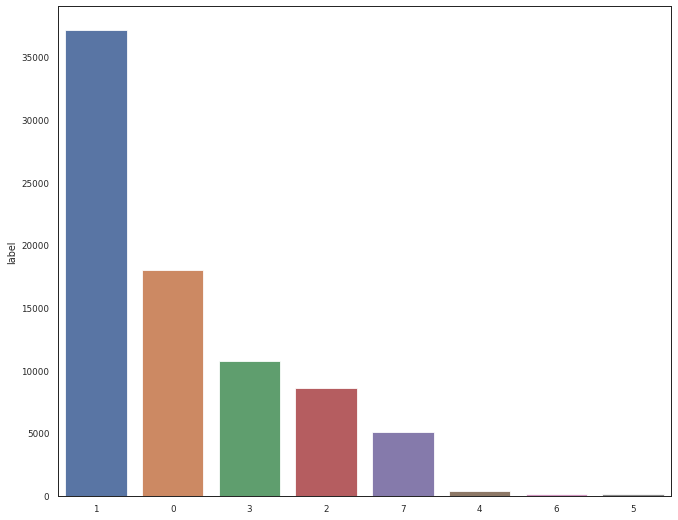

In [ ]:
label_df = df_train['label'].value_counts()

label_df_x = list(label_df.index)
label_df_x = list(map(str, label_df_x))
label_df_x

sns.set_context('paper')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.barplot(data= label_df, x= label_df_x, y=label_df)

Preprocessing

In [ ]:
#imputing missing values (mode/mean)
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)


df_train['org'].fillna(df_train['org'].mode()[0], inplace = True)
df_train['tld'].fillna(df_train['tld'].mode()[0], inplace = True)
df_train['mail_type'].fillna(df_train['mail_type'].mode()[0], inplace = True)
df_train['urls'].fillna(df_train['urls'].mean(), inplace=True)
df_train['images'].fillna(df_train['images'].mean(), inplace=True)
df_train['chars_in_subject'].fillna(df_train['chars_in_subject'].mean(), inplace=True)
df_train['chars_in_body'].fillna(df_train['chars_in_body'].mean(), inplace=True)

df_test['org'].fillna(df_test['org'].mode()[0], inplace = True)
df_test['tld'].fillna(df_test['tld'].mode()[0], inplace = True)
df_test['mail_type'].fillna(df_test['mail_type'].mode()[0], inplace = True)
df_test['urls'].fillna(df_test['urls'].mean(), inplace=True)
df_test['images'].fillna(df_test['images'].mean(), inplace=True)
df_test['chars_in_subject'].fillna(df_test['chars_in_subject'].mean(), inplace=True)
df_test['chars_in_body'].fillna(df_test['chars_in_body'].mean(), inplace=True)


df_train['mail_type'] = df_train['mail_type'].str.lower()
df_test['mail_type'] = df_test['mail_type'].str.lower()

In [ ]:
#cleaning training dataset

df_train['date'] = df_train['date'].str.replace(r' \(.*\)', '')
df_train['date'] = df_train['date'].str.rstrip()
df_train['date'] = df_train['date'].str.replace('-0000', '+0000')
#some data points have 0580 as the time which can be changed to 0530 since 0530 appears the mmost
df_train['date'] = df_train['date'].str.replace('0580', '0530')
#using dateparser since different formats of dates are present. this takes time, but better than manually cconverting each format to unified one
df_train['date'] = df_train['date'].apply(dateparser.parse, languages=['en'])

#cleaning test dataset (same as above)

df_test['date'] = df_test['date'].str.replace(r' \(.*\)', '')
df_test['date'] = df_test['date'].str.rstrip()
df_test['date'] = df_test['date'].str.replace('-0000', '+0000')
df_test['date'] = df_test['date'].str.replace('0580', '0530')
df_test['date'] = df_test['date'].apply(dateparser.parse, languages=['en'])

<ipython-input-5-fc45d34bc519>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['date'] = df_train['date'].str.replace(r' \(.*\)', '')
<ipython-input-5-fc45d34bc519>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['date'] = df_test['date'].str.replace(r' \(.*\)', '')


In [ ]:
df_train['year'] = df_train['date'].apply(lambda x:x.year)
df_train['month'] = df_train['date'].apply(lambda x:x.month)
df_train['day'] = df_train['date'].apply(lambda x:x.day)
df_train['hour'] = df_train['date'].apply(lambda x:x.hour)
df_train['minute'] = df_train['date'].apply(lambda x:x.minute)
df_train['second'] = df_train['date'].apply(lambda x:x.second)
df_train['weekday'] = df_train['date'].apply(lambda x:x.weekday())
#this wanst significant so did not use this in final model
#df_train['timezone'] = df_train['date'].apply(lambda x:x.tzname())

df_test['year'] = df_test['date'].apply(lambda x:x.year)
df_test['month'] = df_test['date'].apply(lambda x:x.month)
df_test['day'] = df_test['date'].apply(lambda x:x.day)
df_test['hour'] = df_test['date'].apply(lambda x:x.hour)
df_test['minute'] = df_test['date'].apply(lambda x:x.minute)
df_test['second'] = df_test['date'].apply(lambda x:x.second)
df_test['weekday'] = df_test['date'].apply(lambda x:x.weekday())
#df_test['timezone'] = df_test['date'].apply(lambda x:x.tzname())

In [ ]:
# making the holiday feature
df_train["date"] = pd.to_datetime(df_train["date"],utc=True)
df_test["date"] = pd.to_datetime(df_test["date"],utc=True)

#can import french ones too
import holidays
import datetime as dt
from datetime import datetime
# getting India holidays

india_holidays = holidays.India(years=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
france_holidays = holidays.France(years=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])

holidays = india_holidays.copy()
holidays.update(france_holidays)

df_train['holiday'] = df_train['date'].dt.date.astype('datetime64').isin(holidays)

df_test['holiday'] = df_test['date'].dt.date.astype('datetime64').isin(holidays)

df_train.holiday = df_train.holiday.replace([True, False], [1, 0])
df_test.holiday = df_test.holiday.replace([True, False], [1, 0])

/usr/local/lib/python3.8/dist-packages/holidays/countries/india.py:176: Warning: Diwali and Holi holidays available from 2010 to 2030 only
  warnings.warn(warning_msg, Warning)


In [ ]:
#cleaning the tld and org columns
! pip install publicsuffix2

from publicsuffix2 import get_public_suffix
from publicsuffix2 import get_sld, get_tld

df_sub = df_train.loc[:,['org','tld']]

df1 = df_sub[df_sub['tld'].apply(lambda x: True if len(x.lower().split('.')) <=1 else False)]
df1['only_tld'] = df1.loc[:,['tld']]
df1['new_org'] = df1['org']
df1 = df1.loc[:,['new_org','only_tld']]

df2 = df_sub[df_sub['tld'].apply(lambda x: True if len(x.lower().split('.'))>1 else False)]
df2['only_tld'] = df2['tld'].apply(lambda x : get_tld(x))
#df2

df2['split_tdl'] = df2['tld'].apply(lambda x: (x.lower().split('.')))
df2['new_org'] = df2['split_tdl'].apply(lambda x: x[0] if len(x)==2 else "_".join(x[0:len(x)-1]))
#df2 

# added a change here
idx1= list(df2[df2.iloc[:,1] == df2.iloc[:,2]].index)
df2.loc[idx1,'new_org'] = df2.loc[idx1,'org']

df2 = df2[['new_org','only_tld']]

df3= pd.concat([df1, df2], axis=0)

df3.sort_index(ascending=True)

df_train = pd.concat([df_train, df3], axis=1)


df_sub = df_test.loc[:,['org','tld']]

df1 = df_sub[df_sub['tld'].apply(lambda x: True if len(x.lower().split('.'))<=1 else False)]
df1['only_tld'] = df1.loc[:,['tld']]
df1['new_org'] = df1['org']
df1 = df1[['new_org','only_tld']]

df2 = df_sub[df_sub['tld'].apply(lambda x: True if len(x.lower().split('.'))>1 else False)]
df2['only_tld'] = df2['tld'].apply(lambda x : get_tld(x))
#df2

#tld_set = set(df2['only_tld'])
df2['split_tdl'] = df2['tld'].apply(lambda x: (x.lower().split('.')))
df2['new_org'] = df2['split_tdl'].apply(lambda x: x[0] if len(x)==2 else "_".join(x[0:len(x)-1]))

# added a change here
idx1= (list(df2[df2['tld'] == df2['only_tld']].index))
df2.loc[idx1,'new_org'] = df2.loc[idx1,'org']
#####

df2 = df2[['new_org','only_tld']]

df3= pd.concat([df1, df2], axis=0)

df3.sort_index(ascending=True)

df_test = pd.concat([df_test, df3], axis=1)

In [ ]:
#Save df to train_clean.csv
df_train.drop('date', axis=1, inplace=True)
df_test.drop('date', axis=1, inplace=True)

df_train.drop('org', axis=1, inplace=True)
df_train.drop('tld', axis=1, inplace=True)

df_test.drop('org', axis=1, inplace=True)
df_test.drop('tld', axis=1, inplace=True)

df_train.to_csv('train_clean.csv')
df_test.to_csv('test_clean.csv')

Different models trial - using lazypredict

In [ ]:
! pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_train = pd.read_csv('train_clean.csv', index_col=0)
df_test = pd.read_csv('test_clean.csv', index_col=0)
for col in ['mail_type', 'new_org', 'only_tld']:
    encoder_x = LabelEncoder()
    encoder_x.fit(df_train[col])
    df_test[col] = df_test[col].map(lambda s: '<unknown>' if s not in encoder_x.classes_ else s)
    encoder_x.classes_ = np.append(encoder_x.classes_, '<unknown>')

    df_train[col] = encoder_x.transform(df_train[col])
    df_test[col] = encoder_x.transform(df_test[col])

y = df_train['label'].values
X = df_train.drop(['label'],axis=1)

X_training, X_test_data, y_training, y_test_data = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:

clf = LazyClassifier(verbose= 0, ignore_warnings= True,  custom_metric= None)
models, predictions = clf.fit(X_training, X_test_data, y_training, y_test_data)

print(models)


XGBOOST - CLASSF 1

In [ ]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import dateparser
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import xgboost as xgb

In [ ]:
df_train = pd.read_csv('train_clean.csv', index_col=0)
df_test = pd.read_csv('test_clean.csv', index_col=0)
for col in ['mail_type', 'new_org', 'only_tld']:
    encoder_x = LabelEncoder()
    encoder_x.fit(df_train[col])
    df_test[col] = df_test[col].map(lambda s: '<unknown>' if s not in encoder_x.classes_ else s)
    encoder_x.classes_ = np.append(encoder_x.classes_, '<unknown>')

    df_train[col] = encoder_x.transform(df_train[col])
    df_test[col] = encoder_x.transform(df_test[col])

y = df_train['label'].values
X = df_train.drop(['label'],axis=1)

X_training, X_test_data, y_training, y_test_data = train_test_split(X, y, test_size=0.2, random_state=0)


params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 8,
    'gamma': 0.1,
    'max_depth': 10,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 0,
    'eta': 0.01,
    'seed': 1000,
    'nthread': 4,
}
dtrain = xgb.DMatrix(X_training, y_training)
dtest = xgb.DMatrix(X_test_data, y_test_data)
num_rounds = 50
model = xgb.train(params, dtrain, num_rounds)
pred = model.predict(dtest)


print(accuracy_score(y_true=y_test_data, y_pred=pred))
print(f1_score(y_true=y_test_data, y_pred=pred, average='micro'))

# xgb to result
X = df_test
test = xgb.DMatrix(X)
pred = model.predict(test)
pred = pred.astype(int)
pred_dict = {'label': pred}

result = pd.DataFrame(pred_dict)
result.to_csv('pred.csv' , index_label='Id')

#capturing prediction for ensemble (to be used later on)
pred_overall = pd.read_csv('pred.csv', index_col = 0)

0.5783237715140933
0.5783237715140933


In [ ]:
model.get_score(importance_type='gain')

NEURAL NETWORK - CLASS 2

In [ ]:
df_train = pd.read_csv('train_clean.csv', index_col = 0)
df_test = pd.read_csv('test_clean.csv', index_col = 0)

n = len(df_train)
temp = pd.concat([df_train, df_test], axis=0, sort=False).drop(['label'], axis=1)

#Take the log of 'chars_in_subject', 'chars_in_body' and 'urls' columns
log = ['chars_in_subject', 'chars_in_body', 'urls']
temp[log] = np.log(temp[log] + 1)

#Add 'org_freq' and 'tld_freq' columns
for col in ['new_org', 'only_tld', 'mail_type']:
    encoding = temp.groupby(col).size()/len(temp)
    temp[col + '_freq'] = temp[col].map(encoding)

#Onehot encode data
catogorical = ['new_org', 'only_tld', 'mail_type']
temp = pd.concat([temp, pd.get_dummies(temp[catogorical], drop_first=True)], axis=1)
temp = temp.drop(catogorical, axis=1)

#Drop apparently non-important features, and date
temp = temp.drop(['bcced', 'designation', 'salutations','month','hour','weekday','second','minute','day'], axis=1)

#Standarize data
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(temp)
temp = transformer.transform(temp)

#Fill nan with -1
temp = np.nan_to_num(temp, -1)

#Split the data to X, y and X_test
X = temp[:n]
X_test = temp[n:]
y = df_train['label']

#Onehot-encode y
y = pd.get_dummies(y)

#NN
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping

n_features = X.shape[1]
input_tensor = Input(shape=(n_features,))
layer1 = Dense(100, activation='relu')(input_tensor)
layer2 = Dense(100, activation='relu')(layer1)
layer3 = Dense(100, activation='relu')(layer2)
output_tensor = Dense(8, activation='sigmoid')(layer3)
model = Model(input_tensor, output_tensor)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X, y, validation_split=0.2, batch_size=16, epochs=100, callbacks=[es])
model.evaluate(X, y)

y_test = model.predict(X_test).argmax(axis=1)
res = pd.DataFrame({'ID': np.arange(len(y_test)),
                    'label': y_test})
res.to_csv('submission-NN.csv', index=False)

#capturing prediction for ensemble (to be used later on)
pred_overall['label_2']=y_test

Epoch 1/100
4009/4009 [==============================] - 18s 4ms/step - loss: 0.8495 - accuracy: 0.5606 - val_loss: 0.7891 - val_accuracy: 0.5764
Epoch 2/100
4009/4009 [==============================] - 14s 4ms/step - loss: 0.7739 - accuracy: 0.5816 - val_loss: 0.7721 - val_accuracy: 0.5887
Epoch 3/100
4009/4009 [==============================] - 15s 4ms/step - loss: 0.7496 - accuracy: 0.5893 - val_loss: 0.7585 - val_accuracy: 0.5846
Epoch 4/100
4009/4009 [==============================] - 15s 4ms/step - loss: 0.7376 - accuracy: 0.5933 - val_loss: 0.7510 - val_accuracy: 0.5836
Epoch 5/100
4009/4009 [==============================] - 14s 3ms/step - loss: 0.7276 - accuracy: 0.5950 - val_loss: 0.7529 - val_accuracy: 0.5929
Epoch 6/100
4009/4009 [==============================] - 15s 4ms/step - loss: 0.7227 - accuracy: 0.5992 - val_loss: 0.7542 - val_accuracy: 0.5945
Epoch 7/100
4009/4009 [==============================] - 17s 4ms/step - loss: 0.7166 - accuracy: 0.5990 - val_loss: 0.7482 -

CATBOOST - CLASSIFIER 3 (this requires different preprocessing than the rest, so again making a new csv file using required preprocessing)

In [ ]:
df_train = pd.read_csv('train.csv', index_col = 0)
df_test = pd.read_csv('test.csv', index_col = 0)

In [ ]:
#imputing missing values (mode/mean)
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)


df_train['org'].fillna(df_train['org'].mode()[0], inplace = True)
df_train['tld'].fillna(df_train['tld'].mode()[0], inplace = True)
df_train['mail_type'].fillna(df_train['mail_type'].mode()[0], inplace = True)
df_train['urls'].fillna(df_train['urls'].mean(), inplace=True)
df_train['images'].fillna(df_train['images'].mean(), inplace=True)
df_train['chars_in_subject'].fillna(df_train['chars_in_subject'].mean(), inplace=True)
df_train['chars_in_body'].fillna(df_train['chars_in_body'].mean(), inplace=True)

df_test['org'].fillna(df_test['org'].mode()[0], inplace = True)
df_test['tld'].fillna(df_test['tld'].mode()[0], inplace = True)
df_test['mail_type'].fillna(df_test['mail_type'].mode()[0], inplace = True)
df_test['urls'].fillna(df_test['urls'].mean(), inplace=True)
df_test['images'].fillna(df_test['images'].mean(), inplace=True)
df_test['chars_in_subject'].fillna(df_test['chars_in_subject'].mean(), inplace=True)
df_test['chars_in_body'].fillna(df_test['chars_in_body'].mean(), inplace=True)


df_train['mail_type'] = df_train['mail_type'].str.lower()
df_test['mail_type'] = df_test['mail_type'].str.lower()

In [ ]:
#cleaning training dataset

df_train['date'] = df_train['date'].str.replace(r' \(.*\)', '')
df_train['date'] = df_train['date'].str.rstrip()
df_train['date'] = df_train['date'].str.replace('-0000', '+0000')
#some data points have 0580 as the time which can be changed to 0530 since 0530 appears the mmost
df_train['date'] = df_train['date'].str.replace('0580', '0530')
#using dateparser since different formats of dates are present. this takes time, but better than manually cconverting each format to unified one
df_train['date'] = df_train['date'].apply(dateparser.parse, languages=['en'])

#cleaning test dataset (same as above)

df_test['date'] = df_test['date'].str.replace(r' \(.*\)', '')
df_test['date'] = df_test['date'].str.rstrip()
df_test['date'] = df_test['date'].str.replace('-0000', '+0000')
df_test['date'] = df_test['date'].str.replace('0580', '0530')
df_test['date'] = df_test['date'].apply(dateparser.parse, languages=['en'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


In [ ]:
# making the holiday feature
df_train["date"] = pd.to_datetime(df_train["date"],utc=True)
df_test["date"] = pd.to_datetime(df_test["date"],utc=True)

#can import french ones too
import holidays
import datetime as dt
from datetime import datetime
# getting India holidays

india_holidays = holidays.India(years=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
france_holidays = holidays.France(years=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])

holidays = india_holidays.copy()
holidays.update(france_holidays)

df_train['holiday'] = df_train['date'].dt.date.astype('datetime64').isin(holidays)

df_test['holiday'] = df_test['date'].dt.date.astype('datetime64').isin(holidays)

df_train.holiday = df_train.holiday.replace([True, False], [1, 0])
df_test.holiday = df_test.holiday.replace([True, False], [1, 0])

/usr/local/lib/python3.7/dist-packages/holidays/countries/india.py:176: Warning: Diwali and Holi holidays available from 2010 to 2030 only
  warnings.warn(warning_msg, Warning)


In [ ]:

df_train['day'] = df_train['date'].apply(lambda x:x.day)
df_train['hour'] = df_train['date'].apply(lambda x:x.hour)
#this lowering the score, so did not use this in final model
#df_train['weekday'] = df_train['date'].apply(lambda x:x.weekday())

df_test['day'] = df_test['date'].apply(lambda x:x.day)
df_test['hour'] = df_test['date'].apply(lambda x:x.hour)
#df_test['weekday'] = df_test['date'].apply(lambda x:x.weekday())

df_train.loc[:, "weekday"] = df_train["date"].dt.weekday
df_train['weekend'] = df_train['weekday'].isin([5,6])
df_train.weekend = df_train.weekend.replace([True, False], [1, 0])
df_train = df_train.drop('weekday', axis=1)

df_test.loc[:, "weekday"] = df_train["date"].dt.weekday
df_test['weekend'] = df_test['weekday'].isin([5,6])
df_test.weekend = df_test.weekend.replace([True, False], [1, 0])
df_test = df_test.drop('weekday', axis=1)

#this lowering the score, so did not use this in final model
# df_train['time'] = df_train['date'].apply(lambda x: x.time())
# df_train['date'] = df_train['date'].apply(lambda x: x.date())

# df_test['time'] = df_test['date'].apply(lambda x: x.time())
# df_test['date'] = df_test['date'].apply(lambda x: x.date())


In [ ]:
#cleaning tld and org
! pip install publicsuffix2

from publicsuffix2 import get_public_suffix
from publicsuffix2 import get_sld, get_tld


df_sub = df_train.loc[:,['org','tld']]

df1 = df_sub[df_sub['tld'].apply(lambda x: True if len(x.lower().split('.')) <=1 else False)]
df1['only_tld'] = df1.loc[:,['tld']]
df1['new_org'] = df1['org']
df1 = df1.loc[:,['new_org','only_tld']]

df2 = df_sub[df_sub['tld'].apply(lambda x: True if len(x.lower().split('.'))>1 else False)]
df2['only_tld'] = df2['tld'].apply(lambda x : get_tld(x))
#df2

df2['split_tdl'] = df2['tld'].apply(lambda x: (x.lower().split('.')))
df2['new_org'] = df2['split_tdl'].apply(lambda x: x[0] if len(x)==2 else "_".join(x[0:len(x)-1]))
#df2 

# added a change here
idx1= list(df2[df2.iloc[:,1] == df2.iloc[:,2]].index)
df2.loc[idx1,'new_org'] = df2.loc[idx1,'org']

df2 = df2[['new_org','only_tld']]

df3= pd.concat([df1, df2], axis=0)

df3.sort_index(ascending=True)

df_train = pd.concat([df_train, df3], axis=1)


df_sub = df_test.loc[:,['org','tld']]

df1 = df_sub[df_sub['tld'].apply(lambda x: True if len(x.lower().split('.'))<=1 else False)]
df1['only_tld'] = df1.loc[:,['tld']]
df1['new_org'] = df1['org']
df1 = df1[['new_org','only_tld']]

df2 = df_sub[df_sub['tld'].apply(lambda x: True if len(x.lower().split('.'))>1 else False)]
df2['only_tld'] = df2['tld'].apply(lambda x : get_tld(x))
#df2

#tld_set = set(df2['only_tld'])
df2['split_tdl'] = df2['tld'].apply(lambda x: (x.lower().split('.')))
df2['new_org'] = df2['split_tdl'].apply(lambda x: x[0] if len(x)==2 else "_".join(x[0:len(x)-1]))

# added a change here
idx1= (list(df2[df2['tld'] == df2['only_tld']].index))
df2.loc[idx1,'new_org'] = df2.loc[idx1,'org']
#####

df2 = df2[['new_org','only_tld']]

df3= pd.concat([df1, df2], axis=0)

df3.sort_index(ascending=True)

df_test = pd.concat([df_test, df3], axis=1)

In [ ]:

df_train.drop('org', axis=1, inplace=True)
df_train.drop('tld', axis=1, inplace=True)

df_test.drop('org', axis=1, inplace=True)
df_test.drop('tld', axis=1, inplace=True)

df_train.to_csv('train_clean_1.csv')
df_test.to_csv('test_clean_1.csv')

In [ ]:
df_train = pd.read_csv('train_clean_1.csv', index_col=0)
df_test = pd.read_csv('test_clean_1.csv', index_col=0)

y = df_train['label'].values
#X = df_train.drop(['label','timezone'],axis=1)
X = df_train.drop(['label'],axis=1)
X["chars_in_subject"] = X["chars_in_subject"].astype(np.int) 


# cat_features = list(range(0, X.shape[1]))
# print(cat_features)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

!pip install catboost
from catboost import CatBoostClassifier


#parameters using the randomized search
from catboost import Pool
clf = CatBoostClassifier(
    iterations=300,
    eval_metric='MultiClass',
    loss_function='MultiClass',
    early_stopping_rounds=10,
    classes_count=8,
    l2_leaf_reg=8,
    random_strength=2,
    bagging_temperature=0.7,
    depth=7,
    verbose=5,
)

clf.fit(
    Pool( X_train, y_train,
    #cat_features=cat_features,
    
    cat_features=[0,2,3,6,7,10,11,12,13,14,15],    
    #cat_features=[1,2,5,6,9,10,11,12,13,14,15], 
    ),
    plot=True,
    use_best_model=True,
    eval_set=(X_val, y_val)
)

print(clf.predict(data=X_val))

X = df_test
#X = df_test.drop(['timezone'],axis=1)
X["chars_in_subject"] = X["chars_in_subject"].astype(np.int) 



pred = clf.predict(data=X)
pred = pred.astype(int)


label=[]
for i in range(len(pred)):
  label.append(pred[i][0])
result = pd.DataFrame(columns=[ 'label'])
#result['Id'] =  np.arange(len(label))
result['label'] = label
result.to_csv('catboost_pred.csv' , index_label='Id')


In [ ]:
#randomized search trial
df_train = pd.read_csv('train_clean_1.csv', index_col=0)
df_test = pd.read_csv('test_clean_1.csv', index_col=0)

y = df_train['label'].values
#X = df_train.drop(['label','timezone'],axis=1)
X = df_train.drop(['label'],axis=1)
X["chars_in_subject"] = X["chars_in_subject"].astype(np.int) 


# cat_features = list(range(0, X.shape[1]))
# print(cat_features)


!pip install catboost
from catboost import CatBoostClassifier
from catboost import Pool

params = {
 "iterations" : [230,300,350],
 "max_depth" : [6, 7,8],
 "l2_leaf_reg" : [7, 8, 9],
# "learning_rate": [0.03, 0.05, 0.07, 0.1],
 "bagging_temperature" : [ 0.4, 0.5 , 0.7],
 "random_strength" : [2, 3, 4]
}

from sklearn.model_selection import RandomizedSearchCV

model = CatBoostClassifier()

randomized_search_result = model.randomized_search(params,
                                                   Pool( X, y, cat_features=[0,2,3,6,7,10,11,12,13,14,15]),
                                                   calc_cv_statistics=True,
                                                   plot=True)


In [ ]:
randomized_search_result

{'params': {'random_strength': 2,
  'depth': 8,
  'l2_leaf_reg': 8,
  'iterations': 300,
  'bagging_temperature': 0.7},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
       

In [ ]:
X = df_test
#X = df_test.drop(['timezone'],axis=1)
X["chars_in_subject"] = X["chars_in_subject"].astype(np.int) 

pred = model.predict(data=X)
pred = pred.astype(int)


label=[]
for i in range(len(pred)):
  label.append(pred[i][0])
result = pd.DataFrame(columns=[ 'label'])
#result['Id'] =  np.arange(len(label))
result['label'] = label
result.to_csv('randomcv_catboost_pred.csv' , index_label='Id')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from google.colab import files
files.download('randomcv_catboost_pred.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#training model on 100% of the data without cv so that we get more accurate results now that we know that the model is not overfitting
df_train = pd.read_csv('train_clean_1.csv', index_col=0)
df_test = pd.read_csv('test_clean_1.csv', index_col=0)

y = df_train['label'].values
#X = df_train.drop(['label','timezone'],axis=1)
X = df_train.drop(['label'],axis=1)
X["chars_in_subject"] = X["chars_in_subject"].astype(np.int) 


from sklearn.model_selection import train_test_split

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

!pip install catboost
from catboost import CatBoostClassifier


from catboost import Pool
clf = CatBoostClassifier(
    iterations=300,
    eval_metric='MultiClass',
    loss_function='MultiClass',
    early_stopping_rounds=10,
    classes_count=8,
    l2_leaf_reg=8,
    random_strength=2,
    bagging_temperature=0.7,
    depth=7,
    verbose=5,
)

clf.fit(
    Pool( X, y,
    #cat_features=cat_features,
    
    cat_features=[0,2,3,6,7,10,11,12,13,14,15],    
    #cat_features=[1,2,5,6,9,10,11,12,13,14,15], 
    )
)

#print(clf.predict(data=X_val))

X = df_test
#X = df_test.drop(['timezone'],axis=1)
X["chars_in_subject"] = X["chars_in_subject"].astype(np.int) 



pred = clf.predict(data=X)
pred = pred.astype(int)


label=[]
for i in range(len(pred)):
  label.append(pred[i][0])
result = pd.DataFrame(columns=[ 'label'])
#result['Id'] =  np.arange(len(label))
result['label'] = label
result.to_csv('catboost_pred.csv' , index_label='Id')


In [ ]:
#capturing prediction for ensemble (to be used later on)
pred_overall['label_3']= label

In [ ]:
pred_overall.to_csv("all_labels.csv")

trial of the ensemble method: mode of the 3 classfier predictions

In [ ]:
#calculating mode
u = pred_overall.filter(like='label').mode(axis=1)
if len(u.columns) > 1:
    u = u.iloc[:, 0].where(u.iloc[:, 1:].isna().all(axis=1))

In [ ]:
u 

,0,1,2
Id,,,
0,1.0,NaN,NaN
1,1.0,NaN,NaN
2,3.0,NaN,NaN
3,1.0,NaN,NaN
4,0.0,NaN,NaN
...,...,...,...
34360,7.0,NaN,NaN
34361,2.0,NaN,NaN
34362,1.0,NaN,NaN


In [ ]:
u.to_csv('ensemble.csv')